# Karman-Trefftz airfoil

For the second assignment of this class, you have used the Joukowski transformation, a conformal map that shapes a cylinder into an airfoil with a cusp at the trailing edge.

Here, we are going to use another conformal map: the Karman-Trefftz transform.
This transform allows us to represent the potential flow around a class of airfoils with a non-zero tail angle at the trailing edge known as Karman-Trefftz airfoils.


**Some recommendations**:

During this exam, you will have to write functions in Python.
Remember, docstrings are cool, they document your functions and help users to understand them.

You will also create some figures.
Make sure they are generated with a publication-quality, that is, the presence of a title or caption, axis labels, and legend (when necessary).

For figures including a filled contour, we recommend the use of the 'viridis' colormap over the usual 'jet'; the last one is not perfectly perceptually-uniform.

In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

---

## First part - Karman-Trefftz conformal mapping

---

### Conformal mapping

The Karman-Trefftz transformation maps a cylinder (defined in the $\xi$-plane) to an airfoil ($z$-plane) that possesses a non-zero tail angle at the trailing edge.

$$z = n \frac{\left(1 + \frac{b^2}{\xi}\right)^n + \left(1 - \frac{b^2}{\xi}\right)^n}{\left(1 + \frac{b^2}{\xi}\right)^n - \left(1 - \frac{b^2}{\xi}\right)^n}$$

where $n = 2 - \frac{\theta}{\pi}$, $\theta$ being the tail angle (in radians) at the trailing edge and $b$ a parameter that controls the thickness of the airfoil.

Note that when we choose a zero tail-angle, the Karman-Trefftz transform reduces to the Joukowski transform.

First, we need to create the conformal mapping between the $\xi$-plane of the cylinder and the $z$-plane of the airfoil.

**List of tasks:**

1- Write a function for the conformal mapping that takes the complex coordinates in the $\xi$-plane as an argument and returns the the comlpex coordinates in the $z$-plane.

To check your function, here is what we obtained:
the point $2.2 + 2.2j$ maps into the point $2.41874477821 + 1.98092269337j$ when using $b=1$ and $theta=5^o$.

In [2]:
def Karman(squigly,b,theta):
    
    n = 2 - theta/math.pi
    
    z = n*((1 + (b**2)/squigly)**n + (1  - (b**2)/squigly)**n)\
         /((1 + (b**2)/squigly)**n - (1  - (b**2)/squigly)**n)
    
    return z

In [3]:
Karman(2.2 + 2.2*1j,1,5*math.pi/180)

(2.4187447782142586+1.980922693367887j)

---

### From a cylinder  to an airfoil

Let's use our new function to map a cylinder into a Karman-Trefftz airfoil.

**List of tasks:**

1- Create a cylinder centered at $\left(x_c, y_c\right)$ with radius $R = \sqrt{\left(b-x_c\right)^2 + y_c^2}$ with $N$ points on its surface where the first and last points overlap.

Use the following parameters:
* $x_c = -0.1$, $y_c = 0.1$
* $b = 1.0$
* $\theta = 5^o$
* $N = 61$

2- Apply the Karman-Trefftz transformation using the function you previously defined to get the complex coordinates of the cambered airfoil.

3- Plot the two geometries on a figure.

4- What is the index and coordinates of the trailing-edge point?

5- What is the location of the first point on the airfoil?

# 1. , 3. 

(1.004536101718726, -1.2045361017187262)

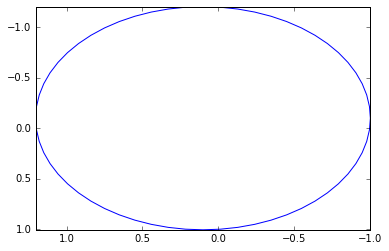

In [4]:
b = 1
xc = -0.1
yc = 0.1
thetac = 5*math.pi/180
Ntheta = 61
R = numpy.sqrt((b-xc)**2+yc**2)
theta = numpy.linspace(0,2*math.pi,Ntheta)

z1 = R*numpy.cos(theta) - xc + (R*numpy.sin(theta) - yc)*1j

pyplot.plot(z1.real,z1.imag)
pyplot.xlim(numpy.max(z1.real),numpy.min(z1.real))
pyplot.ylim(numpy.max(z1.imag),numpy.min(z1.imag))

# 2. , 3.

(2.0067566180259657, -1.9719521097201611)

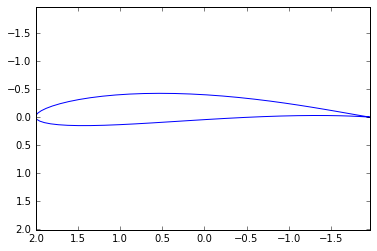

In [5]:
K1 = Karman(z1,b,thetac)
pyplot.plot(K1.real,K1.imag)
pyplot.xlim(numpy.max(K1.real),numpy.min(K1.real))
pyplot.ylim(numpy.max(K1.real),numpy.min(K1.real))

# 4. 

In [6]:
numpy.where(K1.real == numpy.min(K1.real))

(array([29]),)

In [7]:
K1[29]

(-1.9719521097201611-3.6350452671618325e-05j)

# 5.

In [8]:
numpy.where(K1.real == numpy.max(K1.real))

(array([1]),)

In [9]:
K1[1]

(2.0067566180259657+0.0048886968375196366j)

### Mesh-grid in polar coordinates

To visualize the flow in a domain, we should probably create a mesh-grid. Let us do it in polar coordinates in the cylinder-plane ($\xi$-plane).

**List of tasks:**

1- Discretize the mesh-grid using $100$ points in the radial direction ($R\leq r \leq R+5$) and $61$ points on the surface of the cylinder (from $0$ to $2\pi$).

2- Apply the Karman-Trefftz transformation to obtain the mesh-grid in the airfoil-plane ($z$-plane). (Yes! You can use the function we created above.)

3- Plot the mesh-grid in both planes.

# 1. , 3. 

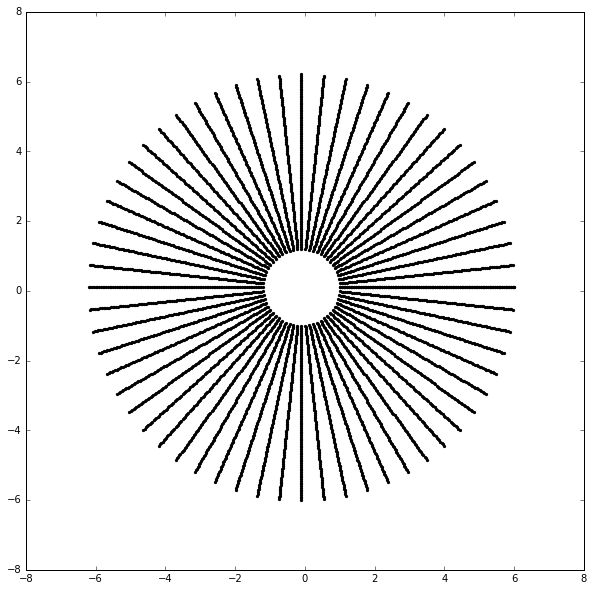

In [10]:

Nr = 100
Ntheta = 61
r = numpy.linspace(R, R+5, Nr)
theta = numpy.linspace(0,2*math.pi,Ntheta)
r_mesh,theta_mesh = numpy.meshgrid(r,theta)
x_grid = r_mesh*numpy.cos(theta_mesh) + xc
y_grid = r_mesh*numpy.sin(theta_mesh) + yc
z_grid = x_grid + y_grid*1j
pyplot.figure(figsize=(10,10))
pyplot.scatter(z_grid.real,z_grid.imag,color ='k', s=5)

# 2. , 3. 

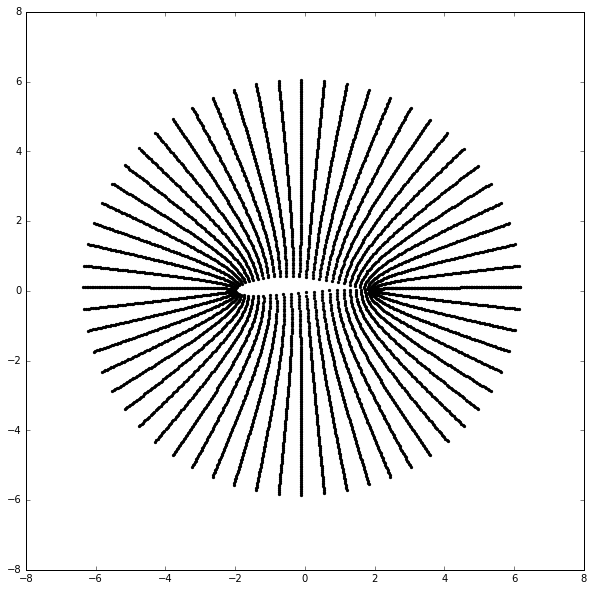

In [11]:
K1_grid = Karman(z_grid,b,thetac)
pyplot.figure(figsize=(10,10))
pyplot.scatter(K1_grid.real,K1_grid.imag,color ='k', s=5)

---

### Freestream + doublet = ?

We are now going to compute the velocity field around a cylinder in the $\xi$-plane.

As we now know, the inviscid flow around a cylinder (with no circulation) can be represented by the sum of a freestream and a doublet.

We will use a freestream with speed $U_\infty = 1$ and angle of incidence $\alpha = 0^o$.

**List of tasks:**

1- What should be the strength of the doublet to represent the flow around a cylinder of radius $R$ immersed in a freestream flow with speed $U_\infty$?

2(a)- Write a function that returns the velocity due to a freestream on a given mesh-grid.

2(b)-Write a function that returns the streamfunction due to a freestream on a given mesh-grid.

3(a)- Write a function that returns the velocity due to a point-doublet on a given mesh-grid.

3(b)- Write a function that returns the streamfunction due to a point-doublet on a given mesh-grid.

4- Using those functions, apply the principle of superposition to get the streamfunction and velocity in the cylinder-plane ($\xi$-plane).

5- Plot the streamlines using [`pyplot.contour`](http://matplotlib.org/api/pyplot_api.html?highlight=contour#matplotlib.pyplot.contour) and the velocity field using [`pyplot.quiver()`](http://matplotlib.org/api/pyplot_api.html?highlight=quiver#matplotlib.pyplot.quiver).

# 1. 

In [12]:
u_inf = 1
strength = (R**2)*2*math.pi*u_inf
strength

7.6654860747590954

# 2. , 3.

In [13]:
def get_vel_freestream(u_inf,X,Y,Nr,Nt):
    
    """
    Returns the velocity field for freestream.
    
    Parameters
    ----------
    u_inf: float
        strength of freestream.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    
    u = u_inf*numpy.ones((Nt, Nr), dtype=float)
    v = numpy.zeros((Nt, Nr), dtype=float)
    
    return u,v

def get_stream_freestream(u_inf,X,Y):
    
    """
    Returns the streamfunction for a doublet.
    
    Parameters
    ----------
    u_inf: float
        strength of freestream.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        stream function for doublet.
    """
    
    psi = u_inf*y_grid
    
    return psi

def get_vel_doublet(strength,x,y,X,Y):
    
    """
    Returns the velocity field for a doublet.
    
    Parameters
    ----------
    strength: float
        strength of doublet.
    x: float
        x-coordinate of the doublet.
    y: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    
    u = -strength/(2*math.pi)*((X-x)**2-(Y-y)**2)/((X-x)**2+(Y-y)**2)**2
    v = -strength/(2*math.pi)*2*(X-x)*(Y-y)/((X-x)**2+(Y-y)**2)**2
    
    return u,v

def get_stream_doublet(strength,x,y,X,Y):
    
    """
    Returns the streamfunction for a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of doublet.
    x: float
        x-coordinate of the doublet.
    y: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        stream function for doublet.
    """
    
    psi = -strength/(2*math.pi)*(Y-y)/((X-x)**2+(Y-y)**2)
    
    return psi

# 4.

In [14]:
x_doublet = xc
y_doublet = yc

u_doublet , v_doublet = get_vel_doublet(strength,x_doublet,y_doublet,x_grid,y_grid)
psi_doublet = get_stream_doublet(strength,x_doublet,y_doublet,x_grid,y_grid)

u_freestream, v_freestream = get_vel_freestream(u_inf,x_grid,y_grid,Nr,Ntheta)
psi_freestream = get_stream_freestream(u_inf,x_grid,y_grid)

u = u_doublet + u_freestream
v = v_doublet + v_freestream
psi = psi_doublet + psi_freestream

# 5.

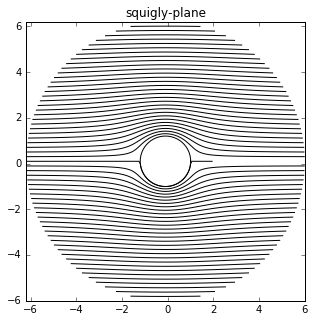

In [15]:
pyplot.figure(figsize=(5,5))
pyplot.contour(x_grid,y_grid,psi,levels=numpy.linspace(numpy.min(psi),numpy.max(psi),61), colors='k', linewidths=1, linestyles='solid')
pyplot.plot(R*numpy.cos(theta)+xc,R*numpy.sin(theta)+yc, color ='k',linewidth = 1)
pyplot.title('squigly-plane')

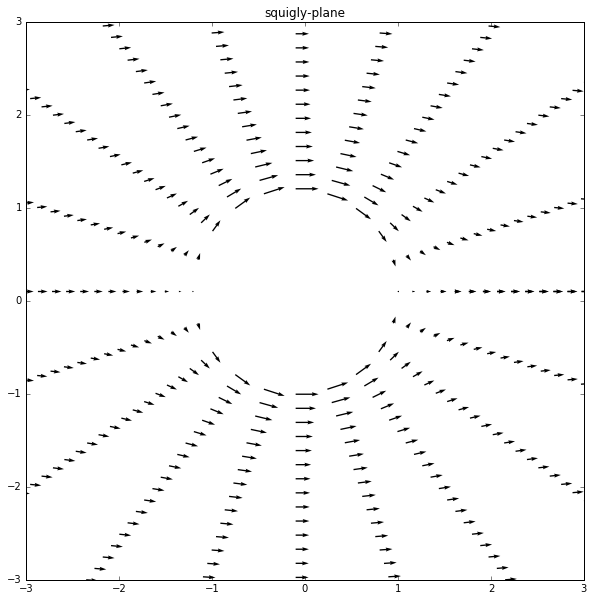

In [16]:
pyplot.figure(figsize=(10,10))
skip = 3
pyplot.quiver(x_grid[::skip,::skip],y_grid[::skip,::skip],u[::skip,::skip],v[::skip,::skip])
pyplot.xlim(-3,3);
pyplot.ylim(-3,3);
pyplot.title('squigly-plane')

---

### Freestream + doublet... Is that enough?

Let's use the theory of conformal mapping to obtain the velocity field around the airfoil in the $z$-plane

We remember that the complex velocity in the $z$-plane is related to the complex one in the $\xi$-plane via the following formula:

$$W_z = W_\xi / \frac{dz}{d\xi}$$

where $W_z = u_z - i v_z$ and $W_\xi = u_\xi - iv_\xi$.

The derivative of $z$ with respect to $\xi$ is:

$$\frac{dz}{d\xi} = \frac{4n^2b^2}{\xi^2 - b^4} \frac{\left(1 + \frac{b^2}{\xi}\right)^n \left(1 - \frac{b^2}{\xi}\right)^n}{\left[\left(1 + \frac{b^2}{\xi}\right)^n - \left(1 - \frac{b^2}{\xi}\right)^n\right]^2}$$

**List of tasks:**

1- Write a function that takes the complex coordinates in the $\xi$-plane as argument and returns the value of the derivative $\frac{dz}{d\xi}$.

To check your function, here is what we obtained:
the function on the point $2.2 + 2.2j$ returns the point $1.00022655827 + 0.0995002428218j$ when using $b=1$ and $theta=5^o$.

2- Compute the velocity on the mesh-grid in the airfoil plane ($z-plane$).

3- Plot the streamlines and the velocity field in the $z$-plane using the Matplotlib functions [`pyplot.contour()`](http://matplotlib.org/api/pyplot_api.html?highlight=contour#matplotlib.pyplot.contour) and [`pyplot.quiver()`](http://matplotlib.org/api/pyplot_api.html?highlight=quiver#matplotlib.pyplot.quiver), respectively.

4- Does the streamlines at the trailing-edge look physical? Why?
(You can display a zoom at the trailing-edge to support your answer.)

# 1.

In [17]:
def Derivative_Karman(squigly,b,theta):

    n = 2 - theta/math.pi
    
    z = (4*(n**2)*(b**2)/((squigly**2)-(b**4)))\
    *(((1+(b**2)/squigly)**n)*((1-(b**2)/squigly)**n))\
    /(((1+(b**2)/squigly)**n)-((1-(b**2)/squigly)**n))**2

    return z 

In [18]:
Derivative_Karman(2.2 + 2.2*1j,b,thetac)

(1.0002265582728562+0.09950024282184344j)

# 2. 

In [19]:
Wsquigly = u - v*1j
Wz = Wsquigly*Derivative_Karman(z_grid,b,thetac)
uz , vz = Wz.real , -1*Wz.imag 

# 3. 

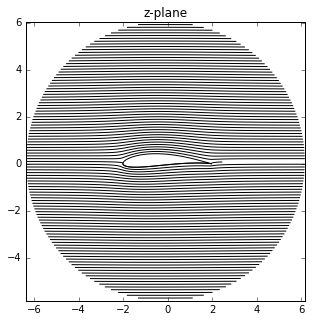

In [20]:
pyplot.figure(figsize=(5,5))
pyplot.contour(K1_grid.real,K1_grid.imag,psi,levels=numpy.linspace(numpy.min(psi),numpy.max(psi),101), colors='k', linewidths=1, linestyles='solid')
z_circle = R*numpy.cos(theta)+xc + (R*numpy.sin(theta)+yc)*1j
pyplot.plot(Karman(z_circle,b,thetac).real,Karman(z_circle,b,thetac).imag, color ='k')
pyplot.title('z-plane')

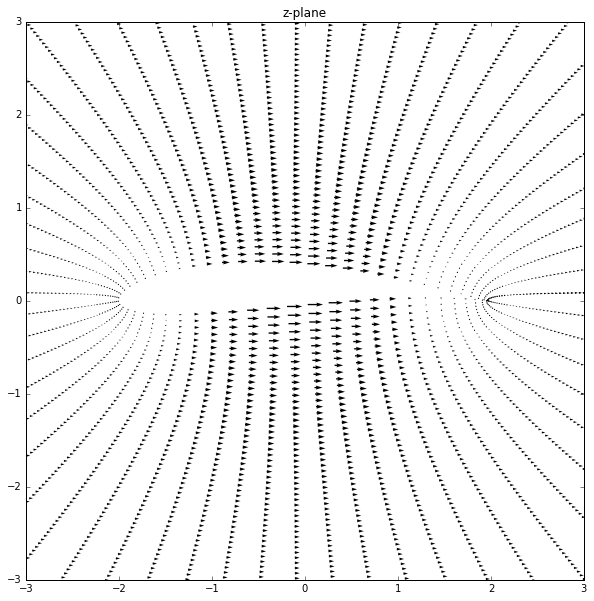

In [21]:
pyplot.figure(figsize=(10,10))
skip = 1
pyplot.quiver(K1_grid.real[::skip,::skip],K1_grid.imag[::skip,::skip],uz[::skip,::skip],vz.imag[::skip,::skip])
pyplot.xlim(-3,3);
pyplot.ylim(-3,3);
pyplot.title('z-plane')

# 4. 

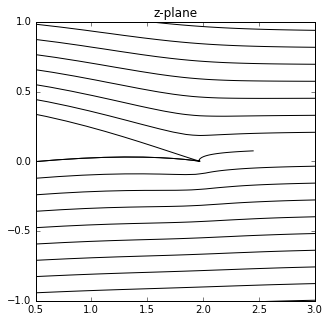

In [22]:
pyplot.figure(figsize=(5,5))
pyplot.contour(K1_grid.real,K1_grid.imag,psi,levels=numpy.linspace(numpy.min(psi),numpy.max(psi),101), colors='k', linewidths=1, linestyles='solid')
z_circle = R*numpy.cos(theta)+xc + (R*numpy.sin(theta)+yc)*1j
pyplot.plot(Karman(z_circle,b,thetac).real,Karman(z_circle,b,thetac).imag, color ='k')
pyplot.title('z-plane')
pyplot.xlim(.5,3);
pyplot.ylim(-1,1);

No this does not appear to be physical the streamline should not just go to zero

---

### Pressure coefficient

Let's have a look at the pressure coefficient to check what's going on.

**List of tasks:**

1- Compute the pressure coefficient and plot its filled contour in both planes using the Matplotlib function [`pyplot.contourf()`](http://matplotlib.org/api/pyplot_api.html?highlight=contourf#matplotlib.pyplot.contourf).

2- What is the minimum value of the pressure coefficient on the surface of the airfoil?

3- What are the index of the stagnation points?

4- The angle of incidence of the freestream is zero, so why is the stagnation point not at the trailing edge?

 # 1.

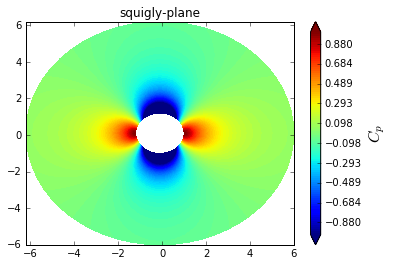

In [23]:
cp_squigly = 1.0 - (u**2 + v**2)/u_inf**2
cp_z = 1.0 - (uz**2 + vz**2)/u_inf**2
contf = pyplot.contourf(x_grid, y_grid, cp_squigly, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(numpy.linspace(-.88,.88,10))
pyplot.title('squigly-plane')

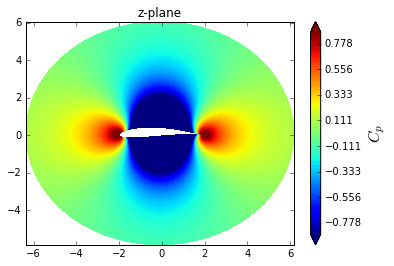

In [24]:
contf = pyplot.contourf(K1_grid.real, K1_grid.imag, cp_z, levels=numpy.linspace(-.88, .88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(numpy.linspace(-1,1,10))
pyplot.title('z-plane')

# 2.

In [25]:
numpy.min(cp_z[:,0])

-14.015103805091316

# 3.

In [26]:
numpy.where(numpy.abs(uz) < 1e-5 )

(array([ 0, 30, 60]), array([0, 0, 0]))

# 4.

The interaction with the tail angle creates an artitical angle of attack and thus alters the stagnation point away from the trailing edge 

---

### Kutta condition!

We need to satisfy the [Kutta condition](http://en.wikipedia.org/wiki/Kutta_condition),
>"A body with a sharp trailing edge which is moving through a fluid will create about itself a circulation of sufficient strength to hold the rear stagnation point at the trailing edge."

**List of tasks:**

1- Calculate the circulation needed to satisfy the Kutta condition (i.e. to bring the stagnation point to the trailing-edge).

2(a)- Write a function that returns the velocity field due to a vortex-point on a given mesh-grid.

2(b)- Write a function that returns the streamfunction due to a vortex-point on a given mesh-grid.

3- Apply the principle of superposition to take into account the effect of the vortex.

4- Compute and plot the streamlines and velocity field in both planes.

5- Compute and plot filled contour of pressure coefficient in both planes.

6- What are the index of the stagnation points? Is it what you were expecting?

## The artifical angle of attack is 1 grid point off from the trailing edge being the stagnation point therefore the artifical angle of attack is 6 degrees

# 1.

In [27]:
AoA = 6
gamma = -strength*2*math.sin(-1*AoA*math.pi/180)/R
x_vor ,y_vor = 0.0 , 0.0
gamma

1.4508561166037997

# 2.

In [28]:
def get_vel_vor(strength, x, y, X, Y):
    
    """
    Returns the velocity field for a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of vortex.
    x: float
        x-coordinate of the vortex.
    y: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of velocity field.
    v: 2D Numpy array of floats
        y-component of velocity field.
    """
    u = + strength/(2*math.pi)*(Y-y)/((X-x)**2+(Y-y)**2)
    v = - strength/(2*math.pi)*(X-x)/((X-x)**2+(Y-y)**2)
    return u, v

def get_stream_vor(strength,x,y,X,Y):
    
    """
    Returns the velocity field for a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of vortex.
    x: float
        x-coordinate of the vortex.
    y: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of velocity field.
    v: 2D Numpy array of floats
        y-component of velocity field.
    """
    
    psi = strength/(4*math.pi)*numpy.log((X-x)**2+(Y-y)**2)
    return psi

# 3.

In [29]:
u_vor,v_vor = get_vel_vor(gamma,x_vor,y_vor,x_grid,y_grid)
psi_vor = get_stream_vor(gamma,x_vor,y_vor,x_grid,y_grid)

u , v = u + u_vor , v + v_vor 
psi = psi + psi_vor

# 4.

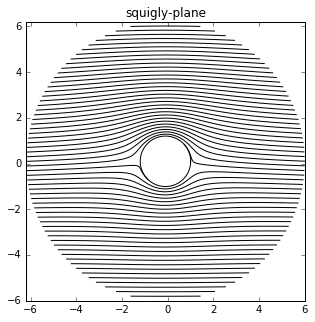

In [30]:
pyplot.figure(figsize=(5,5))
pyplot.contour(x_grid,y_grid,psi,levels=numpy.linspace(numpy.min(psi),numpy.max(psi),61), colors='k', linewidths=1, linestyles='solid')
pyplot.plot(R*numpy.cos(theta)+xc,R*numpy.sin(theta)+yc, color ='k',linewidth = 1)
pyplot.title('squigly-plane')

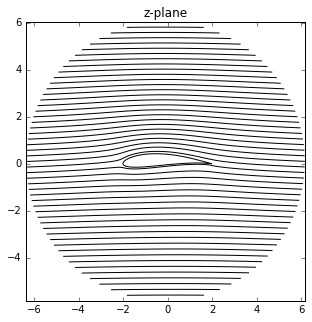

In [40]:
pyplot.figure(figsize=(5,5))
pyplot.contour(K1_grid.real,K1_grid.imag,psi,levels=numpy.linspace(numpy.min(psi),numpy.max(psi),51), colors='k', linewidths=1, linestyles='solid')
z_circle = R*numpy.cos(theta)+xc + (R*numpy.sin(theta)+yc)*1j
pyplot.plot(Karman(z_circle,b,thetac).real,Karman(z_circle,b,thetac).imag, color ='k')
pyplot.title('z-plane')

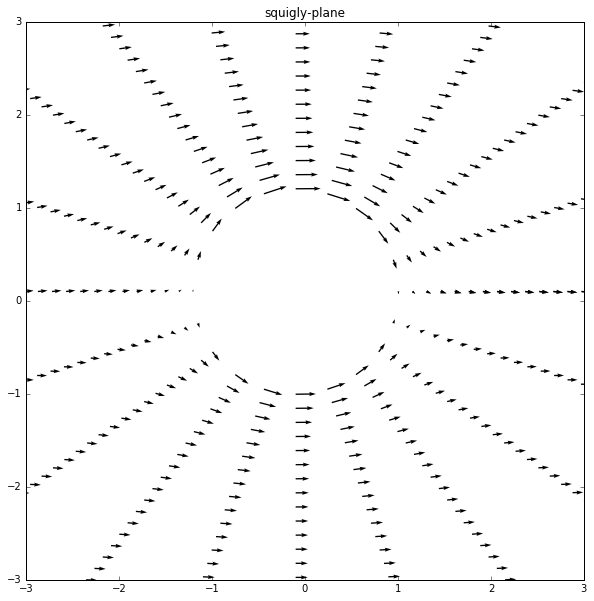

In [32]:

pyplot.figure(figsize=(10,10))
skip = 3
pyplot.quiver(x_grid[::skip,::skip],y_grid[::skip,::skip],u[::skip,::skip],v[::skip,::skip])
pyplot.xlim(-3,3);
pyplot.ylim(-3,3);
pyplot.title('squigly-plane')

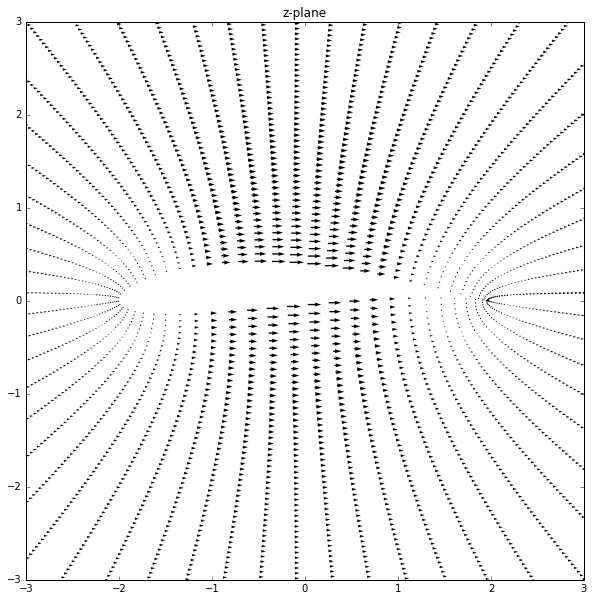

In [33]:
Wsquigly = u - v*1j
Wz = Wsquigly*Derivative_Karman(z_grid,b,thetac)
uz , vz = Wz.real , -1*Wz.imag 
pyplot.figure(figsize=(10,10))
skip = 1
pyplot.quiver(K1_grid.real[::skip,::skip],K1_grid.imag[::skip,::skip],uz[::skip,::skip],vz.imag[::skip,::skip])
pyplot.xlim(-3,3);
pyplot.ylim(-3,3);
pyplot.title('z-plane')

# 5. 

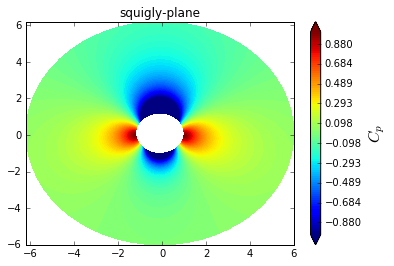

In [34]:
cp_squigly = 1.0 - (u**2 + v**2)/u_inf**2
cp_z = 1.0 - (uz**2 + vz**2)/u_inf**2
contf = pyplot.contourf(x_grid, y_grid, cp_squigly, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(numpy.linspace(-.88,.88,10))
pyplot.title('squigly-plane')

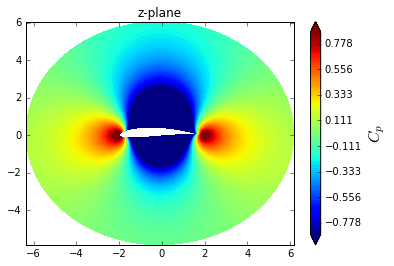

In [35]:
contf = pyplot.contourf(K1_grid.real, K1_grid.imag, cp_z, levels=numpy.linspace(-.88, .88, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks(numpy.linspace(-1,1,10))
pyplot.title('z-plane')

# 6.

In [36]:
numpy.where(numpy.abs(uz[:,0]) < 1e-2 )

(array([31, 59]),)

## This is not what i expected my assumtions on how the artificial angle of attack must be incrorrect

---

### What about the lift and drag?

The drag is defined as the force felt by the body in the direction of the freestream and the lift as the one normal to the freestream direction.

**List of tasks:**

1- Assuming a density $\rho=1$ and a farfield pressure $p_\infty=0$, calculate the lift in two manners:
* using the Kutta-Joukowski theorem,
* integrating the pressure along the surface of the cylinder.

2- Calculate the drag by integrating the pressure along the surface of the cylinder. What's the value? Is it what you were expecting? Why?

In [52]:
rho = 1 
p_inf = 0 

L = gamma*rho*u_inf
L

1.4508561166037997

In [57]:
L = -sum(0.5*rho*(u_inf**2)*cp_squigly[1:,0]*numpy.sin(theta[1:])*R)
L

13.721355724832573

In [55]:
D = -sum(cp_squigly[1:,0]*numpy.cos(theta[1:])*R)
D

0.039473773336815343

## The drag is expected to be zero and it is very close to that value

---

## Second part - Sources and vortices

---

In the first part of the exam, we have used a conformal mapping and the complex-variable theory to model the flow around an airfoil.

Here, we are going to provide you a set of points which represent the previously used Karman-Trefftz airfoil, as well as the source-strength and vortex-strength associated with each point.

Your task will be to load those data from a file, compute the velocity field generated by those singularities, and apply the principle of superposition.

We are going to use the same freestream conditions: speed $U_\infty = 1$ with angle of incidence $\alpha = 0^o$.

The file `airfoil_data_midterm.txt` contains $N$ lines (where $N$ is the number of points used to discretize the airfoil) and 4 columns (x-coordinates, y-coordinates, source-strenghts, and vortex-strengths).

You are problably wondering how we obtained those source-strenghts and vortex-strengths.
Well, they are the solution from a source-vortex panel method that we are going to program during the second part of the semester.

**List of tasks:**

1- Read the data from the file `airfoil_data_midterm.txt` using the Numpy function [`numpy.loadtxt()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). (You might want to set the keyword argument `unpack` to `True`.)

2- Create a $201 \times 201$ Cartesian mesh-grid that covers the domain $[-2.5, 2.5]\times[-2.5, 2.5]$.

3- Write a function to compute the velocity field due a source-point.

4- Compute the velocity field generated by the freestream, the source-points, and the vortex-points and plot the streamlines using the Matplotlib function [`pyplot.streamplot()`](http://matplotlib.org/api/pyplot_api.html?highlight=streamplot#matplotlib.pyplot.streamplot).

5- Compute the pressure coefficient on the mesh-grid and plot its filled contour. What are the coordinates of the maximum pressure coefficient?

6- Calculate the lift using the Kutta-Joukowski theorem. (Hint: the total circulation corresponds to the sum of all vortex strengths.)

In [38]:
# Write your function in this cell.

In [58]:
Sigma = numpy.loadtxt('airfoil_data_midterm.txt')
